# Assignment 2
## 1. Setup & Imports
Importing the required libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

### 1. Function(s) Implementation

In [34]:
def sird_model(y, t, beta, gamma, mu):
    """
    SIRD model:

    S = Susceptibles
    I = Infected
    R = Recovered
    D = Deaths
    
    """
    S, I, R, D = y  
    N = S + I + R + D

    dSdt = -1 * beta * S * I / N
    dIdt = (beta * S * I / N) - (gamma * I) - (mu * I)
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

In [35]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """

    # Gamma values to test
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]

    # Set up initial conditions with 4 compartments
    S0 = N - I0
    R0 = 0
    D0 = 0
    y0 = [S0, I0, R0, D0]

    # Time points
    t = np.linspace(0, simulation_days, simulation_days)

    results_list = []
    simulation_results = {}

    # Plot setup
    fig, ax = plt.subplots(figsize=(12, 8))

    # Loop through each gamma value and run the simulation
    for gamma in gamma_values:
        
        # Solve SIRD equations
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        S, I, R, D = sol.T
        
        # Calculate metrics
        # Basic Reproduction Number
        r_zero = beta / gamma 
        
        # Peak number of infected individuals and the day it occurs
        peak_infected = np.max(I)
        peak_day = np.argmax(I)
        
        # Total deaths at the end of the simulation
        total_deaths = D[-1]

        results_list.append({
            'gamma': gamma,
            'R0': round(r_zero, 2),
            'peak_infected': int(peak_infected),
            'peak_day': peak_day,
            'total_deaths': int(total_deaths)
        })

        # Add the infection curve for the current gamma to the plot
        ax.plot(t, I, label=f'γ = {gamma} (R₀ = {r_zero:.2f})')

    # Finalizing Plot
    ax.set_title('Impact of Recovery Rate (γ) on Infected Population', fontsize=16)
    ax.set_xlabel('Days', fontsize=12)
    ax.set_ylabel('Number of Infected Individuals', fontsize=12)
    ax.legend(title='Recovery Rate (γ) & R₀')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Create the results DataFrame
    results_df = pd.DataFrame(results_list)

    return results_df, fig

### 1. Code Execution

C:\Users\janek\AppData\Local\Temp\ipykernel_23488\191706191.py:77: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,6.0,477900,54,165503
1,0.10,3.0,265192,64,83479
2,0.15,2.0,131371,80,47442
3,0.20,1.5,50328,112,25381
4,0.25,1.2,9320,207,9749


C:\Users\janek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\janek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


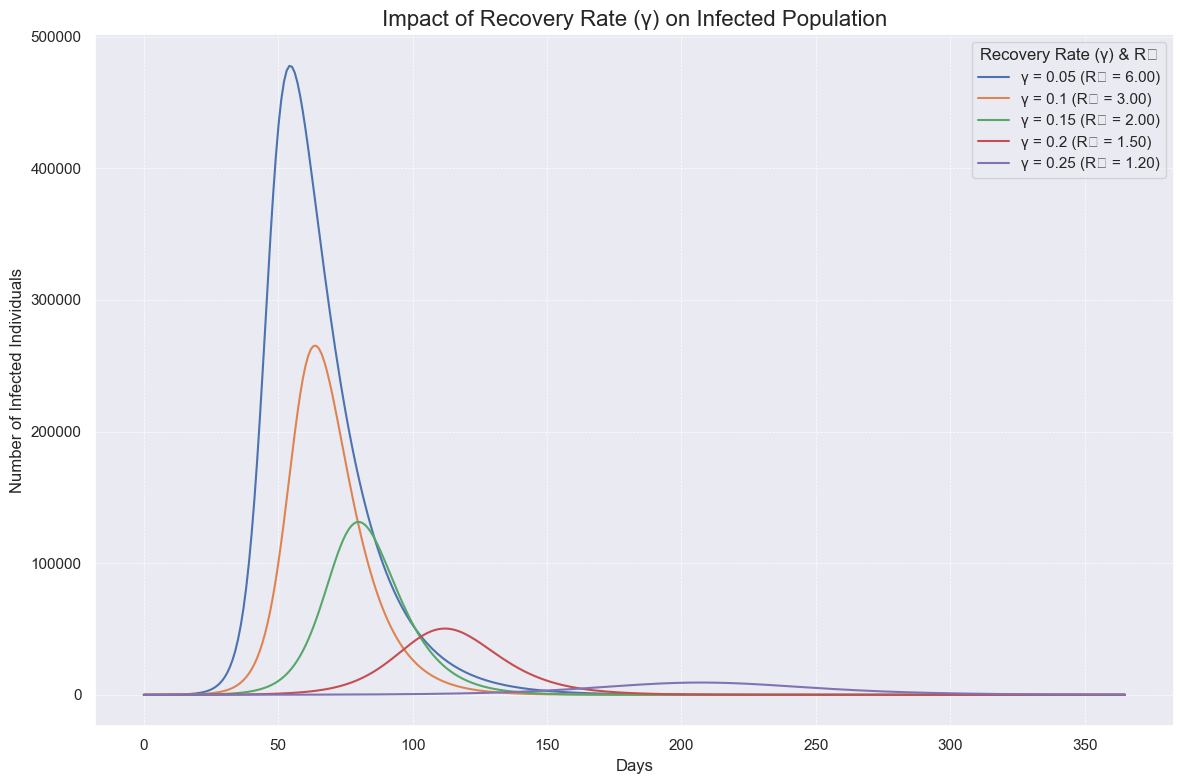

In [36]:
# Define model parameters
BETA = 0.3 # Transmission rate
MU = 0.01 # Mortality rate
N_POPULATION = 1_000_000 # Total population
I0_INITIAL = 10 # Initial infected
SIMULATION_DAYS = 365 # Duration of simulation

# Run the analysis
summary_df, figure = analyze_recovery_rates(
    beta=BETA,
    mu=MU,
    N=N_POPULATION,
    I0=I0_INITIAL,
    simulation_days=SIMULATION_DAYS
)

summary_df

# 2. Scenario comparison

scenario A // high transmission / first graph


C:\Users\janek\AppData\Local\Temp\ipykernel_23488\191706191.py:77: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,8.00,520,21,284
1,0.10,4.00,340,22,159
2,0.15,2.67,213,24,102
3,0.20,2.00,123,27,67
4,0.25,1.60,63,30,42


scenario B // low transmission / second graph


,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,4.00,371,44,88
1,0.10,2.00,139,52,36
2,0.15,1.33,31,67,13
3,0.20,1.00,5,0,1
4,0.25,0.80,5,0,0


C:\Users\janek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\janek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


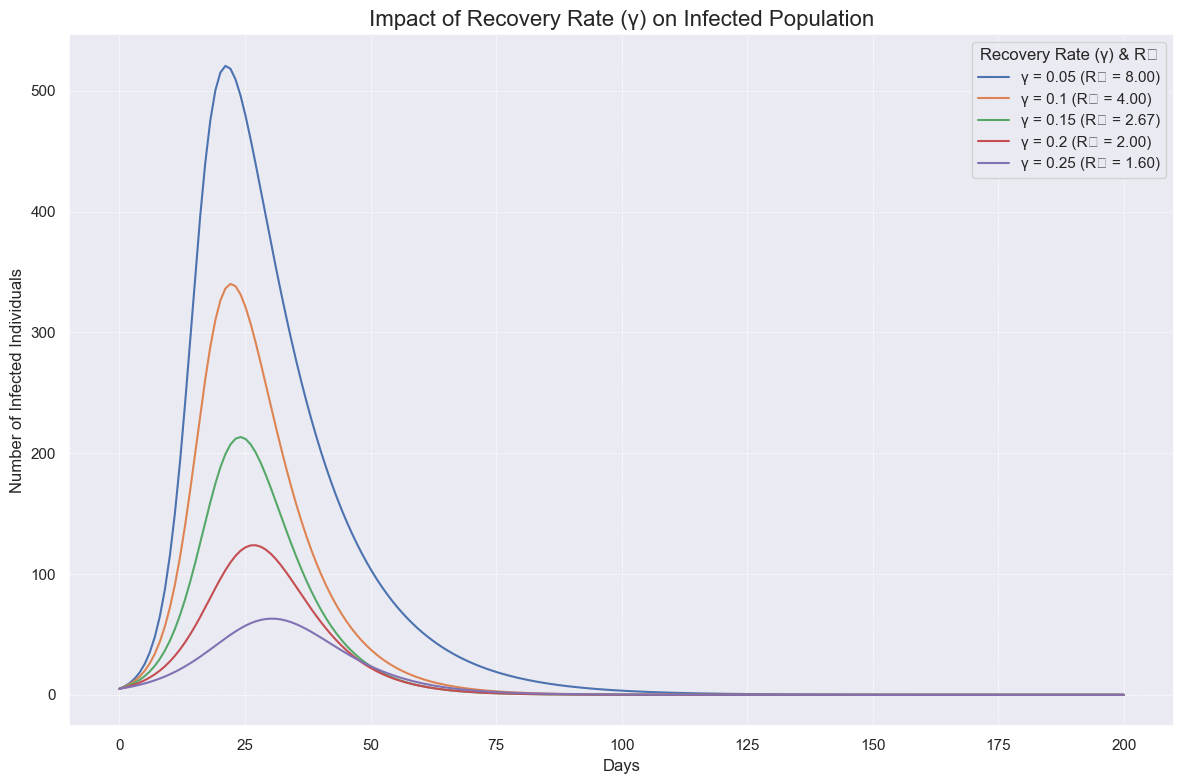

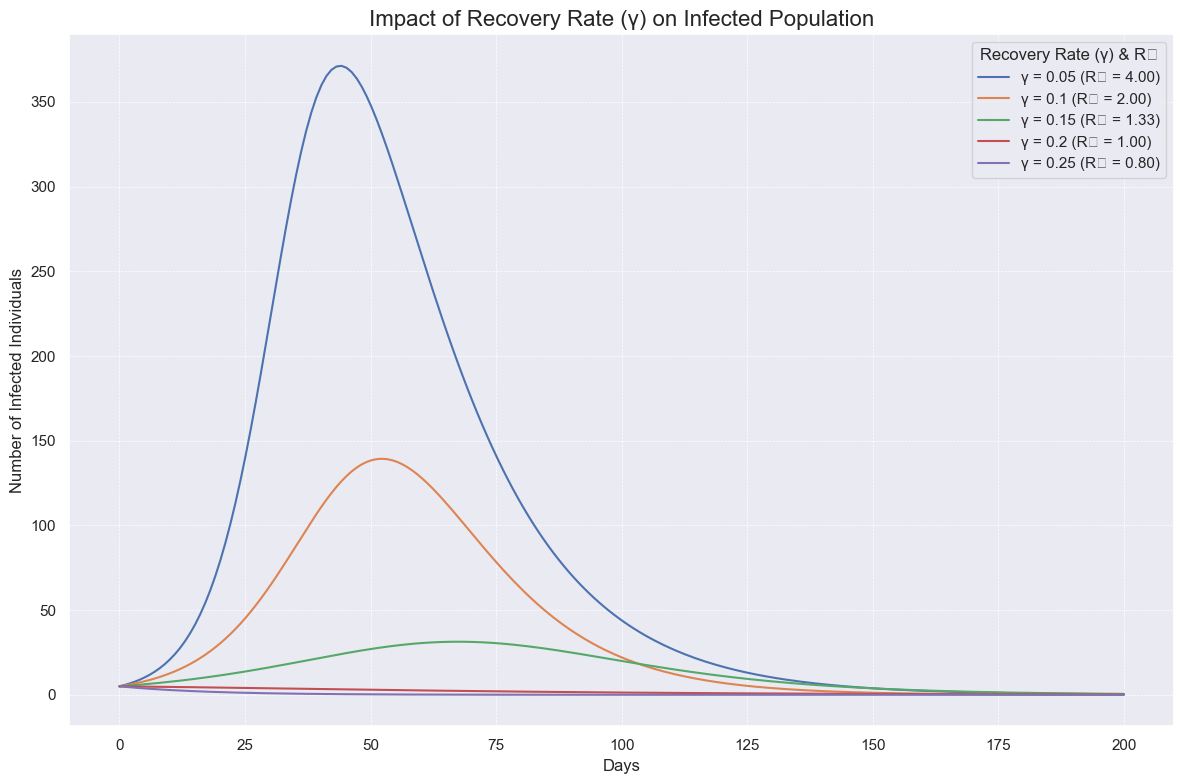

In [37]:
#scenario A // high transmission
params_A = dict(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)

#scenario B // low transmission
params_B = dict(beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200)




#we run the function from part 1 with these new parameters
resA = analyze_recovery_rates(**params_A)
resB = analyze_recovery_rates(**params_B)

if isinstance(resA, tuple):
    results_A, fig_A = resA
else:
    results_A, fig_A = resA, None

if isinstance(resB, tuple):
    results_B, fig_B = resB
else:
    results_B, fig_B = resB, None




#tables and graphs 
results_A = results_A.sort_values("gamma").reset_index(drop=True)
results_B = results_B.sort_values("gamma").reset_index(drop=True)

print("scenario A // high transmission / first graph")
display(results_A)

print("scenario B // low transmission / second graph")
display(results_B)


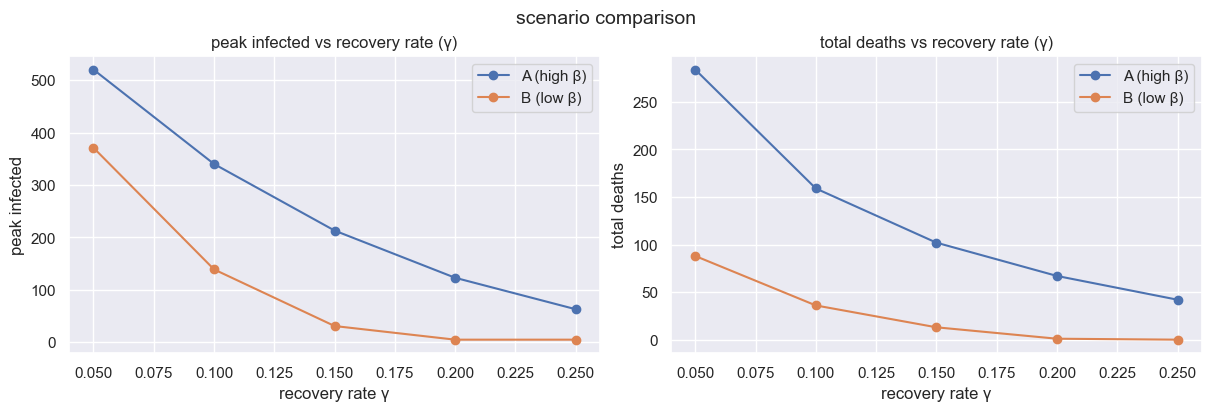

In [47]:
#our results
A = results_A.assign(scenario="A (high β)")
B = results_B.assign(scenario="B (low β)")
both = pd.concat([A, B], ignore_index=True)


fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)



#peak infected vs gamma
for label, df in both.groupby("scenario"):
    axes[0].plot(df["gamma"], df["peak_infected"], marker="o", label=label)
axes[0].set_title("peak infected vs recovery rate (γ)")
axes[0].set_xlabel("recovery rate γ")
axes[0].set_ylabel("peak infected")
axes[0].legend()


#total deaths vs gamma
for label, df in both.groupby("scenario"):
    axes[1].plot(df["gamma"], df["total_deaths"], marker="o", label=label)
axes[1].set_title("total deaths vs recovery rate (γ)")
axes[1].set_xlabel("recovery rate γ")
axes[1].set_ylabel("total deaths")
axes[1].legend()




fig.suptitle("scenario comparison", fontsize=14)
plt.show()

In [50]:
#summary plus analysis for our conclusion 


def summarize_pair(a: pd.DataFrame, b: pd.DataFrame):
    s = {}
    s["avg_peak_A"] = a["peak_infected"].mean()
    s["avg_peak_B"] = b["peak_infected"].mean()
    s["avg_deaths_A"] = a["total_deaths"].mean()
    s["avg_deaths_B"] = b["total_deaths"].mean()
    s["worse_peak"] = "A (high β)" if s["avg_peak_A"] > s["avg_peak_B"] else "B (low β)"
    s["worse_deaths"] = "A (high β)" if s["avg_deaths_A"] > s["avg_deaths_B"] else "B (low β)"
    return s

summary = summarize_pair(results_A, results_B)


print("scenario comparison")
print(f"average peak infected — A: {summary['avg_peak_A']:.1f}, B: {summary['avg_peak_B']:.1f}  → worse: {summary['worse_peak']}")
print(f"average total deaths — A: {summary['avg_deaths_A']:.1f}, B: {summary['avg_deaths_B']:.1f}  → worse: {summary['worse_deaths']}")


scenario comparison
average peak infected — A: 251.8, B: 110.2  → worse: A (high β)
average total deaths — A: 130.8, B: 27.6  → worse: A (high β)


### scenario comparison

**Which scenario is worse?**  
Scenario A (High transmission // β) consistently shows higher peak infections and higher total deaths across γ values than Scenario B (Low β). Increasing the recovery rate (γ) reduces both peak size and deaths in both scenarios but the high transmission scenario remains worse overall because β is larger which raises R₀ = β/γ for every γ.

Higher β increases R₀ and this leads to faster and larger outbreaks before recovery can catch up. Even when γ increases, the network level effect of higher transmission keeps Scenario A peaks and deaths above Scenario B.
